In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

import os
import cv2
import random

In [ ]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/HW5KaggleCompetition/multiclass-image-competition/train/"
CATEGORIES = ["1-Tomato 3", "2-Tomato 4", "3-Tomato Cherry Red", "4-Tomato Maroon", "5-Tomato Yellow", "6-Walnut"]


IMG_SIZE = 512

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                #print(img)
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X)
Y = np.array(Y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.4, random_state=42)
callback = EarlyStopping(monitor='val_loss', patience=5)
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(128))

model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))
print(len(x_train))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
histoty = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test), callbacks=[callback])

1398
Epoch 1/10
44/44 [==============================] - 8s 176ms/step - loss: 301.0942 - accuracy: 0.7446 - val_loss: 0.7057 - val_accuracy: 0.7436
Epoch 2/10
44/44 [==============================] - 6s 145ms/step - loss: 0.3144 - accuracy: 0.8999 - val_loss: 0.0459 - val_accuracy: 0.9914
Epoch 3/10
44/44 [==============================] - 6s 145ms/step - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 6s 145ms/step - loss: 0.0358 - accuracy: 0.9871 - val_loss: 0.0085 - val_accuracy: 0.9968
Epoch 5/10
44/44 [==============================] - 6s 145ms/step - loss: 0.0408 - accuracy: 0.9843 - val_loss: 0.0355 - val_accuracy: 0.9979
Epoch 6/10
44/44 [==============================] - 6s 145ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0094 - val_accuracy: 0.9957
Epoch 7/10
44/44 [==============================] - 6s 145ms/step - loss: 0.0194 - accuracy: 0.9928 - val_loss: 0.0053 - val_accuracy: 0.9968

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 510, 510, 30)      840       
_________________________________________________________________
activation_10 (Activation)   (None, 510, 510, 30)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 255, 255, 30)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 253, 253, 60)      16260     
_________________________________________________________________
activation_11 (Activation)   (None, 253, 253, 60)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 60)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 120)    

In [ ]:
model.metrics_names
histoty.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

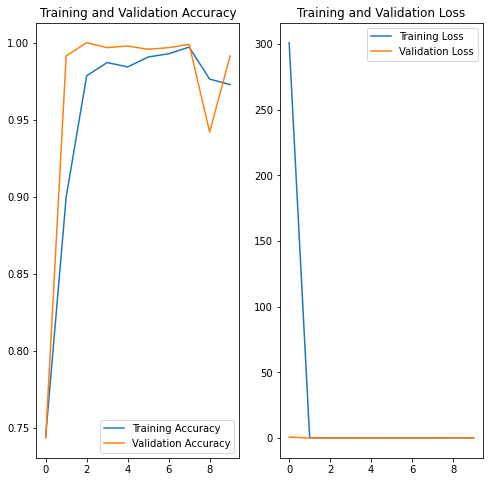

In [ ]:
acc = histoty.history['accuracy']
val_acc = histoty.history['val_accuracy']

loss = histoty.history['loss']
val_loss = histoty.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictPath = "/content/drive/MyDrive/Colab Notebooks/HW5KaggleCompetition/multiclass-image-competition/test/"
os.remove('/content/drive/MyDrive/Colab Notebooks/HW5KaggleCompetition/results_v4.csv')
f = open('/content/drive/MyDrive/Colab Notebooks/HW5KaggleCompetition/results_v4.csv', 'x')
f.write("filename,category")
f.write("\n")

for imgs in os.listdir(predictPath):
  path = os.path.join(predictPath,imgs)
  img = cv2.imread(os.path.join(predictPath,imgs), cv2.IMREAD_COLOR)
  #img = cv2.resize(img,(512,512))
  img = tf.expand_dims(img, 0)
  predictions = model.predict(img)
  f.write(imgs + "," + str(np.argmax(predictions[0])+1))
  f.write("\n")

f.close()

# Took help in understanding prediction part from https://www.tensorflow.org/tutorials/images/classification. 